In [1]:
import requests
import numpy as np
import pandas as pd
myAPIKey = "jAsqMUOKeAflhORIQAzkV2DFe69yLXQ5DPEcfUqK"

In [5]:
# dictionary of things I eat usually on a daily basis in grams. Foods quailified to be on the list of my
# most regularly eaten foods if I ate them more than 3 times a week. These numbers are based on estimates 
# across all the time I ate the food that week 
foodIntakeDict = {"ramen":85,"everything bagel":95,"tomato":54,"spinach":10,"avocado":75,"black beans":200,
                  "cream cheese":7,"wheat pasta":110,"broccoli":120,"frozen shrimp":90,"oat creamer":3,
                 "maple syrup":1,"raspberry":98,"soy sauce":20}

foodBrandDict = {"ramen":"maruchan","everything bagel":"thomas'","black beans":"kuner's",
                "soy sauce":"signature select","maple syrup":"anderson's pure maple syrup",
                "oat creamer":"mooala","cream cheese":"philadelphia"}

produceList = ["broccoli","raspberry","spinach","avocado","tomato"]

In [270]:
# my first question is what the main macro nutrients are of each of the main foods I eat.
# the way the data base works is you input a search query (the food you're searching for) and it gives you 
# dictionary of results which can often consist of hundreds or thousands of results. 
# to start, I'm going to write two functions that take some food as an input string
# the first one returns the nutrient info for all the 
# so that I can choose the one that best matches the food I've specified 

def findBrandNames(food):
    mySearch = requests.get("https://api.nal.usda.gov/fdc/v1/foods/search?&api_key="+myAPIKey+"&query="+food).json()
    for thing in mySearch["foods"]:
        if thing["dataType"] == "Branded":
            print(thing["brandOwner"])
            if "brandName" in thing:
                print(thing["brandName"])
                print()
            else:
                print("no brand name")
                print()

    
# findBrandNames("everything bagel")
# findBrandNames("black beans")
# findBrandNames("soy sauce")
# findBrandNames("maple syrup")
# findBrandNames("oat creamer")
findBrandNames("penne")

Joseph Seviroli Inc
SEVIROLI

Target Stores
ARCHER FARMS

PASTA LEGUME
no brand name

TANTILLO
no brand name

Hodgson Mill Inc
HODGSON MILL

A. Zerega's Sons Inc
COLUMBIA

Mr. Beverages Old Time Cocktail Mixes
MARA'S PASTA

Harmons Inc
HARMONS

Harmons Inc
HARMONS

Reames Foods Inc
PRESTO PASTA

FRATELLI MINAGLIA
no brand name

Basic American Foods, Inc.
MODERN TABLE

Riviana Foods Inc.
PRINCE

American Italian Pasta Company
MUELLER'S

New World Pasta Company
CREAMETTE

New World Pasta Company
SAN GIORGIO

Raley's
RALEY'S

Wal-Mart Stores, Inc.
GREAT VALUE

General Mills, Inc.
CREATE MEAL

Price Chopper Supermarkets
MARKET 32

TOLERANT
no brand name

Wegmans Food Markets, Inc.
WEGMANS

New World Pasta Company
RONZONI

FIBER GOURMET
no brand name

CAMELA'S
no brand name

Riviana Foods Inc.
RONZONI

Nestle Usa-Frozen Food Division
STOUFFER'S

Nestle Usa-Frozen Food Division
STOUFFER'S

The Harris Soup Company
HARRY'S FRESH FOODS

Eatrageous, Inc.
EATRAGEOUS

Eatrageous, Inc.
EATRAGEOUS



In [269]:
# this function returns everything about the food so I can check it's the result I 
# want and then add the food id (fdcId) to a dictionary
def catelogFood(brand,food):
    Search = requests.get("https://api.nal.usda.gov/fdc/v1/foods/search?&api_key="+myAPIKey+"&query="+food).json()
    for i in range(len(Search["foods"])):
        if Search["foods"][i]["dataType"] == "Branded":
            if "brandName" in Search["foods"][i]:
                if Search["foods"][i]["brandName"].lower() == brand:
                    print(Search["foods"][i])
        
catelogFood("philadelphia","cream cheese")

{'fdcId': 1566060, 'description': 'CREAM CHEESE', 'lowercaseDescription': 'cream cheese', 'dataType': 'Branded', 'gtinUpc': '021000054053', 'publishedDate': '2021-03-19', 'brandOwner': 'Kraft Heinz Foods Company', 'brandName': 'PHILADELPHIA', 'ingredients': 'PASTEURIZED MILK AND CREAM, SALT, CAROB BEAN GUM, CHEESE CULTURE', 'marketCountry': 'United States', 'foodCategory': 'Cheese', 'allHighlightFields': '<b>Ingredients</b>: PASTEURIZED MILK AND <em>CREAM</em>, SALT, CAROB BEAN GUM, <em>CHEESE</em> CULTURE', 'score': 737.0465, 'foodNutrients': [{'nutrientId': 1003, 'nutrientName': 'Protein', 'nutrientNumber': '203', 'unitName': 'G', 'derivationCode': 'LCCS', 'derivationDescription': 'Calculated from value per serving size measure', 'value': 7.14}, {'nutrientId': 1004, 'nutrientName': 'Total lipid (fat)', 'nutrientNumber': '204', 'unitName': 'G', 'derivationCode': 'LCCS', 'derivationDescription': 'Calculated from value per serving size measure', 'value': 35.7}, {'nutrientId': 1005, 'nut

In [283]:
# this function is for finding produce only
def findProduce(foodList):
    for food in foodList:
        mySearch = requests.get("https://api.nal.usda.gov/fdc/v1/foods/search?&api_key="+myAPIKey+"&query="+food).json()
        for thing in mySearch["foods"]:
            if " raw" in thing["description"]:
                print(thing["description"] + ": "+ str(thing["fdcId"]))
                print()
        
findProduce(produceList)

Broccoli, raw: 1103170

Broccoli, raw: 747447

Broccoli, raw: 170379

Broccoli raab, raw: 170381

Broccoli raab, raw: 1103084

Broccoli, chinese, raw: 1103184

Broccoli, chinese, raw: 169404

Broccoli, leaves, raw: 169329

Broccoli, stalks, raw: 169331

Broccoli, flower clusters, raw: 169330

Raspberries, raw: 1102708

Raspberries, raw: 167755

Spinach, raw: 1103136

Spinach, raw: 168462

Avocado, raw: 1102652

Avocados, raw, California: 171706

Avocados, raw, Florida: 171707

Avocados, raw, all commercial varieties: 171705

Tomatoes, raw: 1103276

Tomatoes, grape, raw: 321360

Tomatoes, green, raw: 170456

Tomatoes, orange, raw: 170502

Tomatoes, yellow, raw: 170096



In [17]:
# create an ongoing dictionary of associated ids so that we can use them to extract the nutrient values later
fdcIdDict = {"ramen noodles":378011,"everything bagel":1506866,"black beans":1491020,"soy sauce":1588194,
            "maple syrup":1588600,"oat creamer":1718705,"cream cheese":1566060,"pasta":1481918, 
            "broccoli":1103170,"raspberry":1102708,"spinach":1103136,"avocado":171705,"tomato":1103276}

In [ ]:
# so now I'm curious about what both the main macro nutrients are in each of these foods and in what 
# quantities

In [59]:
# iterate through the fdcid dict 
# for each food, append array to the 2d array

foodArray = np.empty((0,4), str)
for food in fdcIdDict:
    idSearch = requests.get("https://api.nal.usda.gov/fdc/v1/foods/search?&api_key="+myAPIKey+"&query="+food).json()
    for i in range(len(idSearch["foods"])):
        if idSearch["foods"][i]["fdcId"] == fdcIdDict[food]:
            for thing in idSearch["foods"][i]["foodNutrients"]:
                myList = []
                myList.append(food)
                myList.append(thing["nutrientName"])
                myList.append(float(thing["value"]))
                myList.append(thing["unitName"])
                foodArray = np.append(foodArray,np.array([myList]),axis=0)


In [66]:
foodArray

array([['ramen noodles', 'Calcium, Ca', '85.0', 'MG'],
       ['ramen noodles', 'Iron, Fe', '5.74', 'MG'],
       ['ramen noodles', 'Vitamin A, IU', '426.0', 'IU'],
       ...,
       ['tomato', 'PUFA 22:5 n-3 (DPA)', '0.0', 'G'],
       ['tomato', 'Fatty acids, total monounsaturated', '0.031', 'G'],
       ['tomato', 'Fatty acids, total polyunsaturated', '0.083', 'G']],
      dtype='<U40')

In [67]:
# turn into DF
myFoodDF = pd.DataFrame(foodArray,columns=["foodName","nutrientName","nutrientValue","unit"])

In [69]:
myFoodDF["numberValue"] = myFoodDF["nutrientValue"].apply(float)

In [79]:
myFoodDF.head(20)

,foodName,nutrientName,nutrientValue,unit,numberValue
0,ramen noodles,"Calcium, Ca",85.0,MG,85.00
1,ramen noodles,"Iron, Fe",5.74,MG,5.74
2,ramen noodles,"Vitamin A, IU",426.0,IU,426.00
3,ramen noodles,"Vitamin C, total ascorbic acid",0.0,MG,0.00
4,ramen noodles,Cholesterol,0.0,MG,0.00
5,ramen noodles,Protein,10.6,G,10.60
6,ramen noodles,Total lipid (fat),21.3,G,21.30
7,ramen noodles,"Carbohydrate, by difference",59.6,G,59.60
8,ramen noodles,Energy,468.0,KCAL,468.00
9,ramen noodles,"Sugars, total including NLEA",8.51,G,8.51


In [157]:
# what foods provide me with the most carbohydrates in my diet?
carbDF = myFoodDF[myFoodDF["nutrientName"]=="Carbohydrate, by difference"].sort_values("numberValue",ascending=False)
carbDF
# it looks like maple syrup has the most carbs by weight but I know this is not where most of 
# carbs come from because I hardly have any maple syrup 


,foodName,nutrientName,nutrientValue,unit,numberValue
41,maple syrup,"Carbohydrate, by difference",88.3,G,88.30
7,ramen noodles,"Carbohydrate, by difference",59.6,G,59.60
18,everything bagel,"Carbohydrate, by difference",55.8,G,55.80
35,soy sauce,"Carbohydrate, by difference",13.3,G,13.30
55,oat creamer,"Carbohydrate, by difference",13.3,G,13.30
149,raspberry,"Carbohydrate, by difference",11.9,G,11.90
386,avocado,"Carbohydrate, by difference",8.53,G,8.53
84,broccoli,"Carbohydrate, by difference",6.64,G,6.64
401,tomato,"Carbohydrate, by difference",3.89,G,3.89
214,spinach,"Carbohydrate, by difference",3.63,G,3.63


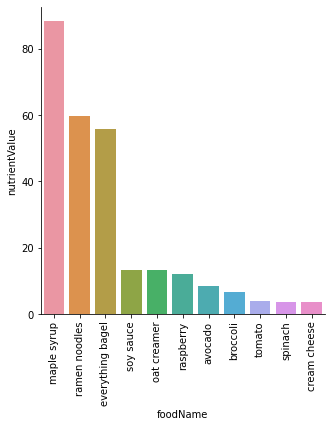

In [162]:
import seaborn as sb
sb.catplot(x="foodName",y="nutrientValue",data=carbDF,kind="bar").set_xticklabels(rotation=90)

In [164]:
# how about protein?
proteinDF = myFoodDF[myFoodDF["nutrientName"]=="Protein"].sort_values("numberValue",ascending=False)
proteinDF

,foodName,nutrientName,nutrientValue,unit,numberValue
5,ramen noodles,Protein,10.6,G,10.60
16,everything bagel,Protein,9.47,G,9.47
68,cream cheese,Protein,7.14,G,7.14
33,soy sauce,Protein,6.67,G,6.67
212,spinach,Protein,2.86,G,2.86
82,broccoli,Protein,2.82,G,2.82
308,avocado,Protein,2.0,G,2.00
147,raspberry,Protein,1.2,G,1.20
399,tomato,Protein,0.88,G,0.88
39,maple syrup,Protein,0.0,G,0.00


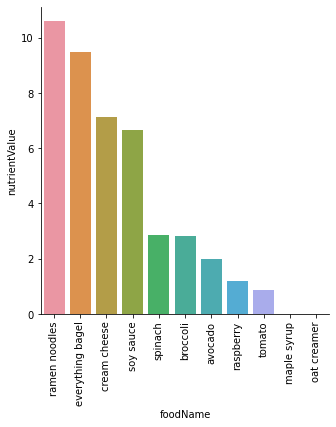

In [165]:
sb.catplot(x="foodName",y="nutrientValue",data=proteinDF,kind="bar").set_xticklabels(rotation=90)
# compared to the carbohydrates, none of the foods I eat consist highly of protein by weight
# it's possible I need more protein 

In [151]:
# all macro nutrients
MacroNutDF=myFoodDF[(myFoodDF["nutrientName"]=="Carbohydrate, by difference")|(myFoodDF["nutrientName"]=="Total lipid (fat)")|(myFoodDF["nutrientName"]=="Protein")].sort_values("numberValue",ascending=False)
MacroNutDF

,foodName,nutrientName,nutrientValue,unit,numberValue
41,maple syrup,"Carbohydrate, by difference",88.3,G,88.30
7,ramen noodles,"Carbohydrate, by difference",59.6,G,59.60
18,everything bagel,"Carbohydrate, by difference",55.8,G,55.80
69,cream cheese,Total lipid (fat),35.7,G,35.70
6,ramen noodles,Total lipid (fat),21.3,G,21.30
338,avocado,Total lipid (fat),14.7,G,14.70
55,oat creamer,"Carbohydrate, by difference",13.3,G,13.30
35,soy sauce,"Carbohydrate, by difference",13.3,G,13.30
149,raspberry,"Carbohydrate, by difference",11.9,G,11.90
5,ramen noodles,Protein,10.6,G,10.60


In [174]:
# now I want to see which of my everyday foods carries the highest amount of 
# total macronutrients
avgMacNutDF = MacroNutDF.groupby("foodName",as_index=False).agg({"numberValue":sum}).sort_values("numberValue",ascending=False)
avgMacNutDF

,foodName,numberValue
6,ramen noodles,91.50
4,maple syrup,88.30
3,everything bagel,68.95
2,cream cheese,46.41
0,avocado,25.23
5,oat creamer,19.97
8,soy sauce,19.97
7,raspberry,13.75
1,broccoli,9.83
9,spinach,6.88


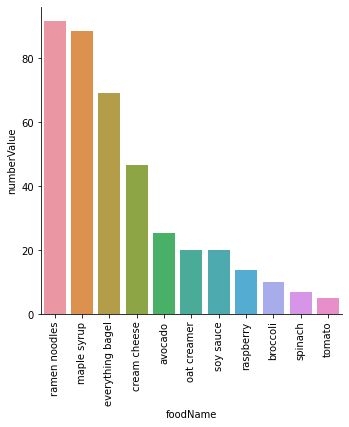

In [175]:
sb.catplot(x="foodName",y="numberValue",data=avgMacNutDF,kind="bar").set_xticklabels(rotation=90)

# overall, ramen noodles have the most of all the macronutrients, but maple syrup follows 
# closely behind it. By weight, these two items have the most macronutrients (protein,
# carbohydrates and fats).

In [262]:
# another thing I'm curious about is iron and how much is in the food I eat
# I exhibit some qualities of anemia, so I would like to know more about how much 
# of my food is made up by iron
ironDF = myFoodDF[myFoodDF["nutrientName"]=="Iron, Fe"].sort_values("numberValue",ascending=False)
ironDF

,foodName,nutrientName,nutrientValue,unit,numberValue
1,ramen noodles,"Iron, Fe",5.74,MG,5.74
23,everything bagel,"Iron, Fe",3.26,MG,3.26
223,spinach,"Iron, Fe",2.71,MG,2.71
46,maple syrup,"Iron, Fe",2.4,MG,2.40
93,broccoli,"Iron, Fe",0.73,MG,0.73
158,raspberry,"Iron, Fe",0.69,MG,0.69
312,avocado,"Iron, Fe",0.55,MG,0.55
410,tomato,"Iron, Fe",0.27,MG,0.27
60,oat creamer,"Iron, Fe",0.0,MG,0.00
75,cream cheese,"Iron, Fe",0.0,MG,0.00


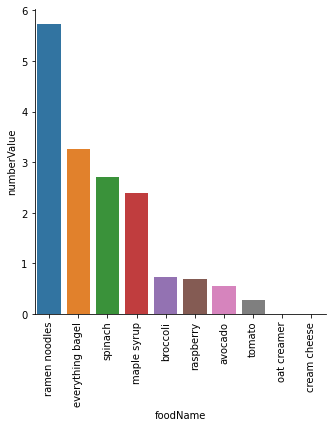

In [263]:
sb.catplot(x="foodName",y="numberValue",data=ironDF,kind="bar").set_xticklabels(rotation=90)

# based on this plot, ramen noodles have the most iron by weight, however, spinach likely 
# has far more overall because of how light it is 

In [266]:
with open("Vitamin and mineral requirements in human nutrition, 2nd edition.txt","r",encoding = "latin1") as book:
    vitaminBook = book.read()

import re

In [208]:
vitaminString = ""

for character in vitaminBook: 
    if character != '\xad':
        vitaminString += character 
    else:   
        newChar = character.replace(character,"")
        vitaminString += newChar



In [259]:
# using this simple function, I extracted some information from the book "Vitamin and Mineral
# Requirements in Human Nutrition" about the role of iron in the body
def findInfo(nutrient):
    print(re.findall("\d+. "+nutrient+"[\w\s\.\,]+",vitaminString)[1])
    
findInfo("Iron")

13. Iron 
13.1 Role of iron in human metabolic processes 
Iron has several vital functions in the body. It serves as a carrier of oxygen to the tissues from the lungs by red blood cell haemoglobin, as a transport medium for electrons within cells, and as an integrated part of important enzyme systems in various tissues. The physiology of iron has been extensively reviewed 


In [267]:
from bs4 import BeautifulSoup 

In [280]:
nutritionRequirements = requests.get("https://www.healthline.com/nutrition/micronutrients#types-and-functions").text

In [281]:
nutritionRequirementsSoup = BeautifulSoup(nutritionRequirements,"html.parser")

In [287]:
# what are the daily mineral requirements? Including iron?
mineralRequirements = nutritionRequirementsSoup.find_all("table",id="t1536830974199")[3]
mineralRequirements

<table class="responsive css-1pp4cxb" id="t1536830974199"><tbody><tr><td class="topHeader">Nutrient</td><td class="topHeader">Sources</td><td class="topHeader">RDA or AI (adults &gt; 19 years)</td></tr><tr><td class="">Iron</td><td>Oysters, white beans, spinach</td><td>8–18 mg</td></tr><tr><td class="">Manganese</td><td>Pineapple, pecans, peanuts</td><td>1.8–2.3 mg</td></tr><tr><td class="">Copper</td><td>Liver, crabs, cashews</td><td>900 mcg</td></tr><tr><td class="">Zinc</td><td>Oysters, crab, chickpeas</td><td>8–11 mg</td></tr><tr><td class="">Iodine</td><td>Seaweed, cod, yogurt</td><td>150 mcg</td></tr><tr><td class="">Fluoride</td><td>Fruit juice, water, crab</td><td>3–4 mg</td></tr><tr><td class="">Selenium</td><td>Brazil nuts, sardines, ham</td><td>55 mcg</td></tr></tbody></table>

In [302]:
for thing in mineralRequirements.find("tbody"):
    print(thing.find_all("td")[0].text + ": "+ thing.find_all("td")[2].text)

Nutrient: RDA or AI (adults > 19 years)
Iron: 8–18 mg
Manganese: 1.8–2.3 mg
Copper: 900 mcg
Zinc: 8–11 mg
Iodine: 150 mcg
Fluoride: 3–4 mg
Selenium: 55 mcg
